<font size='6'>The Cauchy Distribution</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='Density'>

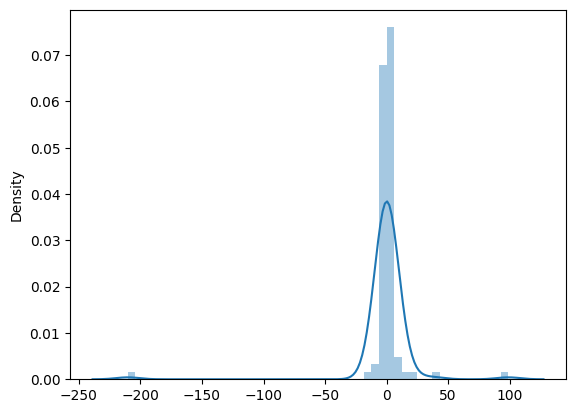

In [14]:
%pip install scipy
import scipy.stats as stats 
cauchy_data=stats.cauchy.rvs(loc=0, scale=1, size=100) 
sns.distplot(cauchy_data)

In [3]:
from scipy.optimize import minimize
def cauchy_mle(data):
    def neg_log_likelihood(params):
        loc, scale = params
        return -np.sum(np.log(1 / (np.pi * scale * (1 + ((data - loc) / scale)**2))))
    
    initial_guess = [np.median(data), np.median(np.abs(data - np.median(data)))]
    result = minimize(neg_log_likelihood, initial_guess, method='Nelder-Mead')
    return result.x

In [4]:
loc_est, scale_est = cauchy_mle(cauchy_data)

print(f"Estimated location: {loc_est:.4f}")
print(f"Estimated scale: {scale_est:.4f}")

Estimated location: -0.0197
Estimated scale: 2.0913


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


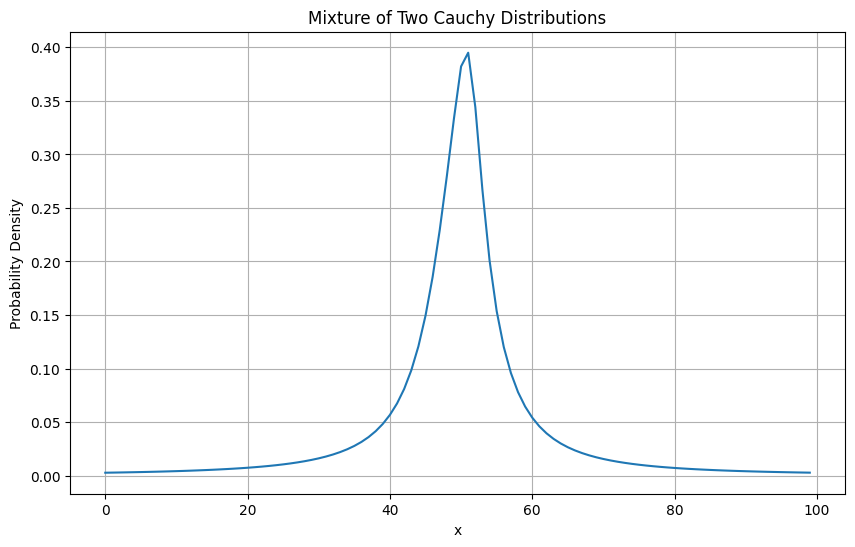

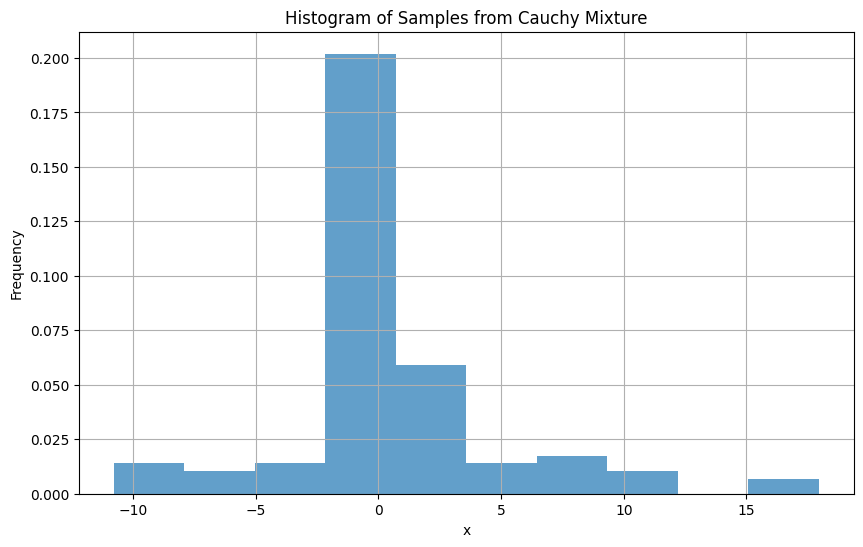

In [2]:
%pip install keras
%pip install tensorflow
%pip install tensorflow-probability 
%pip install tf-keras
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt

# Create the mixture distribution
tfd = tfp.distributions

# Define the mixture weights
mix_weights = [0.7, 0.3]

# Define the two Cauchy components
components = [
    tfd.Cauchy(loc=0., scale=1),
    tfd.Cauchy(loc=0.31415, scale=1/2)
]

# Create the mixture distribution
cauchy_mixture = tfd.Mixture(
    cat=tfd.Categorical(probs=mix_weights),
    components=components,
    name="CauchyMixture"
)

# Generate x values for plotting
x = tf.linspace(-10.0, 10.0, 100)

# Compute the probability density function (PDF)
pdf = cauchy_mixture.prob(x)

# Plot the mixture distribution
plt.figure(figsize=(10, 6))
plt.plot(pdf)
plt.title("Mixture of Two Cauchy Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

# Generate samples from the mixture distribution
samples = cauchy_mixture.sample(100)

# Plot the histogram of samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=10, density=True, alpha=0.7)
plt.title("Histogram of Samples from Cauchy Mixture")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()